<a href="https://colab.research.google.com/github/nivedha75/Columbia-Summer-Coursework/blob/master/Copy_of_EDA_tranformation_fe_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistics Resources

*   [The Online Stat Book](http://onlinestatbook.com/)
*   [Khan Academy AP Statistcs](https://www.khanacademy.org/math/ap-statistics)

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/gdrive')

df = pd.read_csv('/content/gdrive/My Drive/titanic (1).csv')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [ ]:
df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


### Describe each of our features and outcome variable

**Central Tendency**

```
df['Fare'].mean()
df['Fare'].median()
```
The mean is generally the best measure of central tendency. However, when there are a few extreme scores and/or the graph is strongly skewed, use the median - an outlier have a huge affect on the mean.


In [ ]:
df['Fare'].mean()

32.30542018038328

In [ ]:
df['Fare'].median()

14.4542

**Standard Deviation and Variance**

Standard deviation measures how spread out the numbers are or how far, on average, values are from the mean.

```
df['Age'].std()
df['Fare'].std()
```
Remember standard deviation is used to calculate how much spread is in the data.


In [ ]:
df['Age'].std()

14.121908405462555

**Distribution**

Normal-ish

```
df['Age'].hist()
```
-> There is symmetry in the normal-ish 


Skewed Right

```
df['Fare'].hist()
```

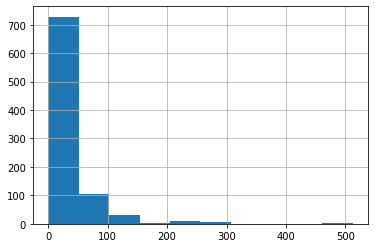

In [ ]:
df['Fare'].hist()
#skewed because of outliers so median is a better central tendency measure

**Frequency/Counts**

```
df['Survived'].value_counts()
```

In [ ]:
df['Survived'].value_counts()

0    545
1    342
Name: Survived, dtype: int64

```
df['Pclass'].value_counts().plot(kind='bar')
df['Pclass'].value_counts(normalize=True).plot(kind='bar')
```

In [ ]:
df['Pclass'].value_counts()

3    487
1    216
2    184
Name: Pclass, dtype: int64

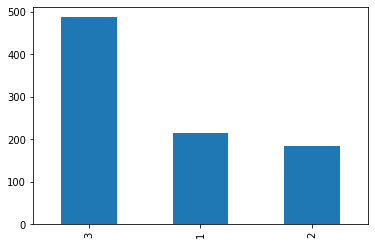

In [ ]:
df['Pclass'].value_counts().plot(kind='bar')

### Compare Variables

**Compare 2 categorical features**



```
pd.crosstab(df.Survived, df.Sex)
pd.crosstab(df.Survived, df.Sex).apply(lambda r: r/r.sum(), axis=1)

```




In [ ]:
pd.crosstab(df.Survived, df.Sex)

Sex,female,male
Survived,,
0,81,464
1,233,109


**Compare categorical and a numeric features**

These are plotting packages w/ libraries

[Official Seaborn Tutorial](https://seaborn.pydata.org/tutorial.html)

[Matplotlib Pyplot Tutorial](https://matplotlib.org/3.3.0/tutorials/introductory/pyplot.html)


```
import seaborn as sns
sns.boxplot(x='Pclass', y="Fare", data=df)
```


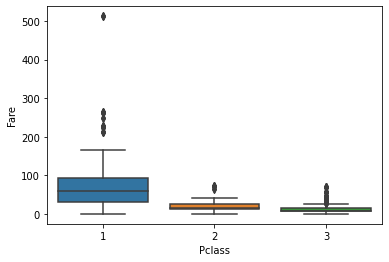

In [ ]:
import seaborn as sns
sns.boxplot(x='Pclass', y="Fare", data=df)
#1st class is symmetrical so the dots outside are outliers

**Compare numeric features**

```
df.plot(kind = 'scatter', x = 'Age', y = 'Fare')
```

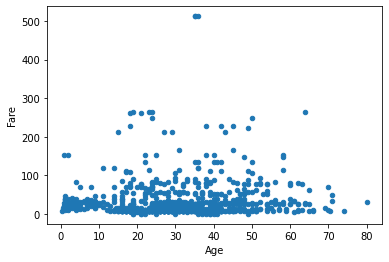

In [ ]:
df.plot(kind = 'scatter', x = 'Age', y = 'Fare')
#there is no correlation

**Correlation Coefficient**

[More on Correlation Coefficient](http://onlinestatbook.com/2/describing_bivariate_data/pearson.html)

- Measures how strong a relationship is between two features. 
- -1 represents a very strong negative relationship.
- 1 represents a very strong positive relationship.
- 0 represents no relationship

```
df[['Age','Siblings/Spouses Aboard','Parents/Children Aboard','Fare']].corr()
```



In [ ]:
df[['Age','Siblings/Spouses Aboard','Parents/Children Aboard','Fare']].corr()
#closer to 0: less correlation
#closer to 1: more correlation
#higher the number the more correlation

,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
Age,1.000000,-0.297669,-0.193741,0.112329
Siblings/Spouses Aboard,-0.297669,1.000000,0.414244,0.158839
Parents/Children Aboard,-0.193741,0.414244,1.000000,0.215470
Fare,0.112329,0.158839,0.215470,1.000000


**Correlation Matrix**



```
import seaborn as sn

sn.heatmap(df[['Age','Siblings/Spouses Aboard','Parents/Children Aboard','Fare']].corr(), annot=True)
```



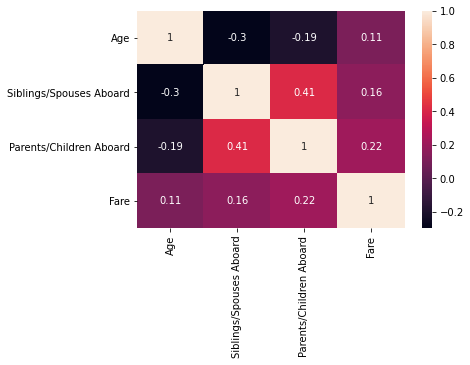

In [ ]:
import seaborn as sn
#heat map is great for showing the correlation for a large number of features
sn.heatmap(df[['Age','Siblings/Spouses Aboard','Parents/Children Aboard','Fare']].corr(), annot=True)

The goal is to get a better understanding of which features may impact your outcome variable.

### Outliers

The series may be skewed and/or have outliers. What you consider to be an outlier depends on the problem you are trying to solve.



```
df.boxplot(column=['Fare'])
```



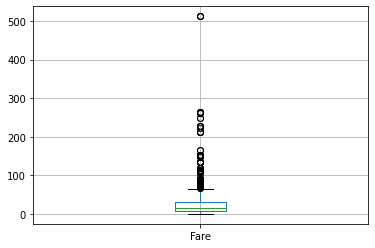

In [ ]:
df.boxplot(column=['Fare'])

If your data is symmetric, you can use the IQR method to set upper and lower limits for cutting off outliers.

```
print(df['Fare'].quantile(.75))
print(df['Fare'].quantile(.25))

IQR = df['Fare'].quantile(.75) - df['Fare'].quantile(.25)

upper = df['Fare'].quantile(.75)+(1.5*IQR)
lower = df['Fare'].quantile(.25)-(1.5*IQR)

print(upper)
print(lower)
```

Let's check against the distrbution.

```
df['Fare'].hist()
```

In [ ]:
#we can cut off the top of the values at 65(replace with 65) if we had a symmetric data

#75%ile:
print(df['Fare'].quantile(.75))
#25%ile:
print(df['Fare'].quantile(.25))

IQR = df['Fare'].quantile(.75) - df['Fare'].quantile(.25)

upper = df['Fare'].quantile(.75)+(1.5*IQR)
lower = df['Fare'].quantile(.25)-(1.5*IQR)

print(upper)
print(lower)

31.1375
7.925
65.95625
-26.893749999999994


### Data Cleaning



*   Check for any missing values in your dataset.
*   Create a df_cleaned dataframe.
*   Remove any observations with outliers from df_cleaned.
*   Remove the name column from df_cleaned.





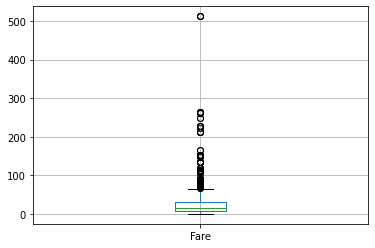

In [ ]:

for x in df.keys():
  df_cleaned = df.loc[~df[x].isnull()]
df
df.boxplot(column=['Fare'])

### Transformations/Feature Engineering

**Transformations**

Create binary variables

```
pd.get_dummies(df['Sex'])
df = df.join(pd.get_dummies(df['Sex']), prefix = 'Sex')
```

In [ ]:
df = df.join(pd.get_dummies(df['Sex'], prefix = 'Sex'))
df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,female,male,Sex_female,Sex_male
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,0,1,0,1
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,1,0,1,0
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,1,0,1,0
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,1,0,1,0
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000,0,1,0,1
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000,1,0,1,0
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500,1,0,1,0
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000,0,1,0,1


Find another categorical feature and create binary features for each of the classes.

In [ ]:
df = df.join(pd.get_dummies(df['Pclass'], prefix = 'pclass'))
df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,female,male,Sex_female,Sex_male,pclass_1,pclass_2,pclass_3
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,0,1,0,1,0,0,1
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,1,0,1,0,1,0,0
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,1,0,1,0,0,0,1
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,1,0,1,0,1,0,0
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000,0,1,0,1,0,1,0
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000,1,0,1,0,1,0,0
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500,1,0,1,0,0,0,1
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000,0,1,0,1,1,0,0


**Feature engineering**


Group numeric feature values

```
df['Age'].hist()

df['lessthan18'] = 0
df.loc[df['Age'] < 18, 'lessthan18'] = 1
```



,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,female,male,Sex_female,Sex_male,pclass_1,pclass_2,pclass_3,lessthan18
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,0,1,0,1,0,0,1,0
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,1,0,1,0,1,0,0,0
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,1,0,1,0,0,0,1,0
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,1,0,1,0,1,0,0,0
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000,0,1,0,1,0,1,0,0
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000,1,0,1,0,1,0,0,0
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500,1,0,1,0,0,0,1,1
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000,0,1,0,1,1,0,0,0


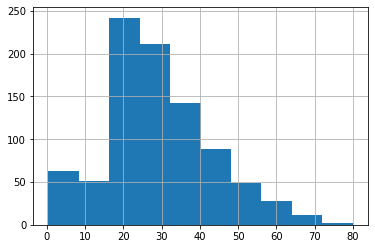

In [ ]:
df['Age'].hist()
#we can create buckets of age groups (0, 1, 2) 
df['lessthan18'] = 0
df.loc[df['Age'] < 18, 'lessthan18'] = 1
df

Use operators to calculate new features



```
df['familysize'] = df['Siblings/Spouses Aboard'] + df['Parents/Children Aboard'] + 1
df['familysize'].hist()
```


Create a new feature that indiciates who is traveling alone.

Is there any relationship between traveling alone and Sex?

Is there any relationship between traveling alone and survival rate?

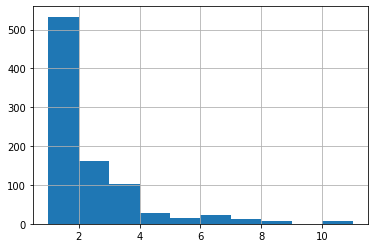

In [ ]:
df['familysize'] = df['Siblings/Spouses Aboard'] + df['Parents/Children Aboard'] + 1
df['familysize'].hist()


In [ ]:
df['traveling_alone'] = 0
df.loc[df['familysize'] == 1, 'traveling_alone'] = 1
df[['traveling_alone', 'Sex_female', 'Sex_male', 'Survived']].corr()
pd.crosstab(df.traveling_alone, df.Survived).apply(lambda r: r/r.sum(), axis = 1)
#df

Survived,0,1
traveling_alone,,
0,0.494350,0.505650
1,0.694184,0.305816


**Scaling**

Scaling your features makes your model more interpretable and for some models, using unscaled features can heavily bias your model to determine that features with large scales are more impactful than features with smaller scales. 

Standard Scaler : 

- Scale all features so standard deviation from the mean equals one
- Use when you need the features to follow an approximately normal distribution (this depends on the model) or the distributions are already normal.

MinMax Scaler : 

- Scale all features so that the range is specified (default = [0,1])
- If you have outliers, the minmax scaler is very sensitive and can heavily compress inliers.
- It preserves the original distribution of the feature and therefore is often a first choice scaling method.


```
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()

scaled = scaler.fit_transform(df[['Age','Fare']])
print(scaled)

scaler = MinMaxScaler()

scaled = scaler.fit_transform(df[['Age','Fare']])
print(scaled)

```



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
 
scaler = StandardScaler()
scaled = scaler.fit_transform(df[['Age','Fare']])
scaled

array([[-0.52936601, -0.50358635],
       [ 0.60426454,  0.78341245],
       [-0.24595837, -0.49001959],
       ...,
       [-1.59214465, -0.17798419],
       [-0.24595837, -0.04633641],
       [ 0.17915309, -0.4935369 ]])

In [ ]:
scaler = MinMaxScaler()
 
scaled = scaler.fit_transform(df[['Age','Fare']])
print(scaled)

[[0.27117366 0.01415106]
 [0.4722292  0.13913574]
 [0.32143755 0.01546857]
 ...
 [0.08268409 0.04577135]
 [0.32143755 0.0585561 ]
 [0.39683338 0.01512699]]




```
scaler = StandardScaler()
scaled = scaler.fit_transform(df[['Age','Fare']])
df_scaled = pd.DataFrame(data=scaled, columns=['Age_scaled','Fare_scaled'])
df.join(df_scaled)
```



In [ ]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df[['Age','Fare']])
df_scaled = pd.DataFrame(data=scaled, columns=['Age_scaled','Fare_scaled'])
df = df.join(df_scaled)
df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,female,male,Sex_female,Sex_male,pclass_1,pclass_2,pclass_3,lessthan18,familysize,traveling_alone,Age_scaled,Fare_scaled
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,0,1,0,1,0,0,1,0,2,0,-0.529366,-0.503586
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,1,0,1,0,1,0,0,0,2,0,0.604265,0.783412
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,1,0,1,0,0,0,1,0,1,1,-0.245958,-0.490020
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,1,0,1,0,1,0,0,0,2,0,0.391709,0.417948
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,0,1,0,1,0,0,1,0,1,1,0.391709,-0.487507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000,0,1,0,1,0,1,0,0,1,1,-0.175106,-0.388018
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000,1,0,1,0,1,0,0,0,1,1,-0.741922,-0.046336
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500,1,0,1,0,0,0,1,1,4,0,-1.592145,-0.177984
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000,0,1,0,1,1,0,0,0,1,1,-0.245958,-0.046336


Notice that we had to manually create the new column names for Age_scaled and Fare_scaled. Let's say our feature list was much larger (15+ features). How can we quickly create a list of new feature names?



In [ ]:
features_to_scale = ['Age', 'Fare']
newcols = {x+'_scaled' for x in features_to_scale}


Create scaled features for Age and Fare using MinMaxScaler.


In [ ]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[['Age','Fare']])
df_scaled = pd.DataFrame(data=scaled, columns=['Age_minmax','Fare_minmax'])
df.join(df_scaled)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,female,male,Sex_female,Sex_male,pclass_1,pclass_2,pclass_3,lessthan18,familysize,traveling_alone,Age_scaled,Fare_scaled,Age_minmax,Fare_minmax
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,0,1,0,1,0,0,1,0,2,0,-0.529366,-0.503586,0.271174,0.014151
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,1,0,1,0,1,0,0,0,2,0,0.604265,0.783412,0.472229,0.139136
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,1,0,1,0,0,0,1,0,1,1,-0.245958,-0.490020,0.321438,0.015469
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,1,0,1,0,1,0,0,0,2,0,0.391709,0.417948,0.434531,0.103644
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,0,1,0,1,0,0,1,0,1,1,0.391709,-0.487507,0.434531,0.015713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000,0,1,0,1,0,1,0,0,1,1,-0.175106,-0.388018,0.334004,0.025374
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000,1,0,1,0,1,0,0,0,1,1,-0.741922,-0.046336,0.233476,0.058556
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500,1,0,1,0,0,0,1,1,4,0,-1.592145,-0.177984,0.082684,0.045771
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000,0,1,0,1,1,0,0,0,1,1,-0.245958,-0.046336,0.321438,0.058556


### Challenge

For the Boston Housing Dataset go through the following steps. Choose the value of homes as your outcome variable:

1. Describe the features in your dataset and the home values. Create at least 3 charts.
2. Compare the home values outcome to other features in your dataset. Which features are correlated to home values?
3. Create a new binary feature using one or more of the other features. Explain your reasoning for creating the binary feature.
4. Engineer another new feature from your dataset.
5. Scale your features using any scaling method.
